<a href="https://colab.research.google.com/github/JessicaYue256/E-transactions-project-2024/blob/main/fraudulent_e_commerce_transactions_colab_ipynb_for_uchi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import dataset https://drive.google.com/file/d/1dhiAxtRjZiH17sE8H-yy1Z0BZIhW6ynE/view?usp=drive_link

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import gdown

file_id = '1dhiAxtRjZiH17sE8H-yy1Z0BZIhW6ynE'
output_path = './file.csv'

url = f'https://drive.google.com/uc?id={file_id}'
gdown.download(url, output_path, quiet=False)

Mounted at /content/drive


Downloading...
From (original): https://drive.google.com/uc?id=1dhiAxtRjZiH17sE8H-yy1Z0BZIhW6ynE
From (redirected): https://drive.google.com/uc?id=1dhiAxtRjZiH17sE8H-yy1Z0BZIhW6ynE&confirm=t&uuid=52163181-d051-4c22-a347-83467457fdba
To: /content/file.csv
100%|██████████| 393M/393M [00:04<00:00, 90.0MB/s]


'./file.csv'

In [ ]:
df = pd.read_csv('./file.csv')

# Cleaning and Visualization

Transaction ID: A unique identifier for each transaction.

Customer ID: A unique identifier for each customer.

Transaction Amount: The total amount of money exchanged in the transaction.

Transaction Date: The date and time when the transaction took place.

Payment Method: The method used to complete the transaction (e.g., credit card, PayPal, etc.).

Product Category: The category of the product involved in the transaction.

Quantity: The number of products involved in the transaction.

Customer Age: The age of the customer making the transaction.

Customer Location: The geographical location of the customer.

Device Used: The type of device used to make the transaction (e.g., mobile, desktop).

IP Address: The IP address of the device used for the transaction.

Shipping Address: The address where the product was shipped.

Billing Address: The address associated with the payment method.

Is Fraudulent: A binary indicator of whether the transaction is fraudulent (1 for fraudulent, 0 for legitimate).

Account Age Days: The age of the customer's account in days at the time of the transaction.

Transaction Hour: The hour of the day when the transaction occurred.

In [ ]:
df.head()

,Transaction ID,Customer ID,Transaction Amount,Transaction Date,Payment Method,Product Category,Quantity,Customer Age,Customer Location,Device Used,IP Address,Shipping Address,Billing Address,Is Fraudulent,Account Age Days,Transaction Hour
0,15d2e414-8735-46fc-9e02-80b472b2580f,d1b87f62-51b2-493b-ad6a-77e0fe13e785,58.09,2024-02-20 05:58:41,bank transfer,electronics,1,17,Amandaborough,tablet,212.195.49.198,Unit 8934 Box 0058\nDPO AA 05437,Unit 8934 Box 0058\nDPO AA 05437,0,30,5
1,0bfee1a0-6d5e-40da-a446-d04e73b1b177,37de64d5-e901-4a56-9ea0-af0c24c069cf,389.96,2024-02-25 08:09:45,debit card,electronics,2,40,East Timothy,desktop,208.106.249.121,"634 May Keys\nPort Cherylview, NV 75063","634 May Keys\nPort Cherylview, NV 75063",0,72,8
2,e588eef4-b754-468e-9d90-d0e0abfc1af0,1bac88d6-4b22-409a-a06b-425119c57225,134.19,2024-03-18 03:42:55,PayPal,home & garden,2,22,Davismouth,tablet,76.63.88.212,"16282 Dana Falls Suite 790\nRothhaven, IL 15564","16282 Dana Falls Suite 790\nRothhaven, IL 15564",0,63,3
3,4de46e52-60c3-49d9-be39-636681009789,2357c76e-9253-4ceb-b44e-ef4b71cb7d4d,226.17,2024-03-16 20:41:31,bank transfer,clothing,5,31,Lynnberg,desktop,207.208.171.73,"828 Strong Loaf Apt. 646\nNew Joshua, UT 84798","828 Strong Loaf Apt. 646\nNew Joshua, UT 84798",0,124,20
4,074a76de-fe2d-443e-a00c-f044cdb68e21,45071bc5-9588-43ea-8093-023caec8ea1c,121.53,2024-01-15 05:08:17,bank transfer,clothing,2,51,South Nicole,tablet,190.172.14.169,"29799 Jason Hills Apt. 439\nWest Richardtown, ...","29799 Jason Hills Apt. 439\nWest Richardtown, ...",0,158,5


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1472952 entries, 0 to 1472951
Data columns (total 16 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   Transaction ID      1472952 non-null  object 
 1   Customer ID         1472952 non-null  object 
 2   Transaction Amount  1472952 non-null  float64
 3   Transaction Date    1472952 non-null  object 
 4   Payment Method      1472952 non-null  object 
 5   Product Category    1472952 non-null  object 
 6   Quantity            1472952 non-null  int64  
 7   Customer Age        1472952 non-null  int64  
 8   Customer Location   1472952 non-null  object 
 9   Device Used         1472952 non-null  object 
 10  IP Address          1472952 non-null  object 
 11  Shipping Address    1472952 non-null  object 
 12  Billing Address     1472952 non-null  object 
 13  Is Fraudulent       1472952 non-null  int64  
 14  Account Age Days    1472952 non-null  int64  
 15  Transaction Hou

In [ ]:
df.describe()

,Transaction Amount,Quantity,Customer Age,Is Fraudulent,Account Age Days,Transaction Hour
count,1.472952e+06,1.472952e+06,1.472952e+06,1.472952e+06,1.472952e+06,1.472952e+06
mean,2.267683e+02,3.000230e+00,3.451208e+01,5.012926e-02,1.796464e+02,1.128696e+01
std,2.703951e+02,1.414736e+00,1.000313e+01,2.182117e-01,1.068642e+02,6.975995e+00
min,1.000000e+01,1.000000e+00,-1.600000e+01,0.000000e+00,1.000000e+00,0.000000e+00
25%,6.861000e+01,2.000000e+00,2.800000e+01,0.000000e+00,8.600000e+01,5.000000e+00
50%,1.517600e+02,3.000000e+00,3.500000e+01,0.000000e+00,1.790000e+02,1.100000e+01
75%,2.960500e+02,4.000000e+00,4.100000e+01,0.000000e+00,2.720000e+02,1.700000e+01
max,1.270175e+04,5.000000e+00,8.600000e+01,1.000000e+00,3.650000e+02,2.300000e+01


In [ ]:
df.describe(include="O")

,Transaction ID,Customer ID,Transaction Date,Payment Method,Product Category,Customer Location,Device Used,IP Address,Shipping Address,Billing Address
count,1472952,1472952,1472952,1472952,1472952,1472952,1472952,1472952,1472952,1472952
unique,1472952,1472952,1346684,4,5,99135,3,1472651,1472948,1472949
top,15d2e414-8735-46fc-9e02-80b472b2580f,d1b87f62-51b2-493b-ad6a-77e0fe13e785,2024-01-27 04:00:16,credit card,health & beauty,New Michael,mobile,170.118.178.249,USS Sanchez\nFPO AE 14652,USCGC Holmes\nFPO AA 56289
freq,1,1,6,368429,295367,1258,491743,2,2,2


In [ ]:
df.isnull().sum()

Transaction ID        0
Customer ID           0
Transaction Amount    0
Transaction Date      0
Payment Method        0
Product Category      0
Quantity              0
Customer Age          0
Customer Location     0
Device Used           0
IP Address            0
Shipping Address      0
Billing Address       0
Is Fraudulent         0
Account Age Days      0
Transaction Hour      0
dtype: int64

<ipython-input-12-645bbe62796e>:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df['Customer Age'], kde=True, palette='#B7D1F8')


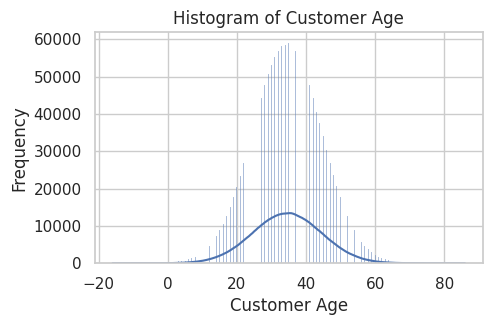

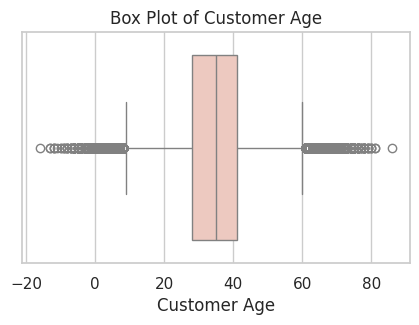

In [ ]:
sns.set(style="whitegrid")
plt.figure(figsize=(5,3))
sns.histplot(df['Customer Age'], kde=True, palette='#B7D1F8')
plt.title('Histogram of Customer Age')
plt.xlabel('Customer Age')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(5,3))
sns.boxplot(x=df['Customer Age'], color='#F5C5B8')
plt.title('Box Plot of Customer Age')
plt.xlabel('Customer Age')
plt.show()

In [ ]:
## We need to convert the **Transaction Date** column from object dtype to datetime format.
df["Transaction Date"] = pd.to_datetime(df["Transaction Date"])

## Extract Day, Day of Week, and Month from the Transaction Date
df['Transaction Day'] = df["Transaction Date"].dt.day
df["Transaction DOW"] = df["Transaction Date"].dt.day_of_week
df["Transaction Month"] = df["Transaction Date"].dt.month


## Fix Customer Column
'''
The lower fence of the customer age is 9. We will replace values between -9 and 8 with the mean,
and values less than -9 will be replaced with their absolute values.
'''
mean_value = np.round(df['Customer Age'].mean(),0)
df['Customer Age'] = np.where(df['Customer Age'] <= -9,
                                np.abs(df['Customer Age']),
                                df['Customer Age'])

df['Customer Age'] = np.where(df['Customer Age'] < 9,
                                mean_value,
                                df['Customer Age'])


## If the Shipping Address is the same as the Billing Address, the value is set to 1, otherwise, it is set to 0.
df["Is Address Match"] = (df["Shipping Address"] == df["Billing Address"]).astype(int)

## Add Transaction_isweekend, Is_Night_Transaction
df["Transaction_isweekend"] = df["Transaction DOW"].apply(lambda x: 1 if x >= 5 else 0)
df['Is_Night_Transaction'] = df['Transaction Hour'].apply(lambda x: 1 if 0 <= x < 6 else 0)


### Remove irrelevant features and downcast the datatype to reduce dataset size
df.drop(columns=["Transaction ID", "Customer ID", "Customer Location",
                 "IP Address", "Transaction Date", "Shipping Address", "Billing Address", "Transaction DOW"], inplace=True)


int_col = df.select_dtypes(include="int").columns
float_col = df.select_dtypes(include="float").columns

df[int_col] = df[int_col].apply(pd.to_numeric, downcast='integer')
df[float_col] = df[float_col].apply(pd.to_numeric, downcast='float')

In [ ]:
df.head()

,Transaction Amount,Payment Method,Product Category,Quantity,Customer Age,Device Used,Is Fraudulent,Account Age Days,Transaction Hour,Transaction Day,Transaction Month,Is Address Match,Transaction_isweekend,Is_Night_Transaction
0,58.090000,bank transfer,electronics,1,17.0,tablet,0,30,5,20,2,1,0,1
1,389.959991,debit card,electronics,2,40.0,desktop,0,72,8,25,2,1,1,0
2,134.190002,PayPal,home & garden,2,22.0,tablet,0,63,3,18,3,1,0,1
3,226.169998,bank transfer,clothing,5,31.0,desktop,0,124,20,16,3,1,1,0
4,121.529999,bank transfer,clothing,2,51.0,tablet,0,158,5,15,1,1,0,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1472952 entries, 0 to 1472951
Data columns (total 14 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Transaction Amount     1472952 non-null  float32
 1   Payment Method         1472952 non-null  object 
 2   Product Category       1472952 non-null  object 
 3   Quantity               1472952 non-null  int8   
 4   Customer Age           1472952 non-null  float32
 5   Device Used            1472952 non-null  object 
 6   Is Fraudulent          1472952 non-null  int8   
 7   Account Age Days       1472952 non-null  int16  
 8   Transaction Hour       1472952 non-null  int8   
 9   Transaction Day        1472952 non-null  int8   
 10  Transaction Month      1472952 non-null  int8   
 11  Is Address Match       1472952 non-null  int8   
 12  Transaction_isweekend  1472952 non-null  int8   
 13  Is_Night_Transaction   1472952 non-null  int8   
dtypes: float32(2), int

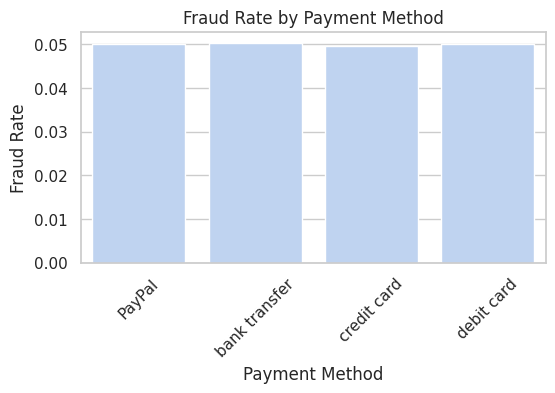

In [ ]:
# Fraud Rate by Payment Method
sns.set(style="whitegrid")
plt.figure(figsize=(6, 3))
category_fraud_rate = df.groupby('Payment Method')['Is Fraudulent'].mean()
sns.barplot(x=category_fraud_rate.index, y=category_fraud_rate.values, color='#B7D1F8')
plt.title('Fraud Rate by Payment Method')
plt.xlabel('Payment Method')
plt.ylabel('Fraud Rate')
plt.xticks(rotation=45)
plt.show()

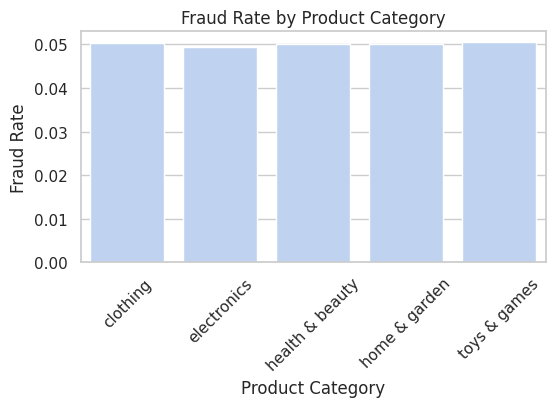

In [ ]:
# Fraud Rate by Product Category
sns.set(style="whitegrid")
plt.figure(figsize=(6, 3))
category_fraud_rate = df.groupby('Product Category')['Is Fraudulent'].mean()
sns.barplot(x=category_fraud_rate.index, y=category_fraud_rate.values, color='#B7D1F8')
plt.title('Fraud Rate by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Fraud Rate')
plt.xticks(rotation=45)
plt.show()

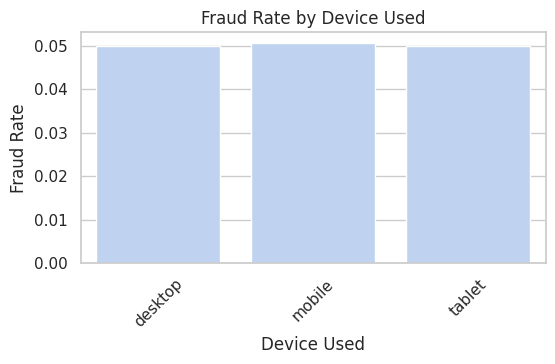

In [ ]:
# Fraud Rate by Device Used
sns.set(style="whitegrid")
plt.figure(figsize=(6, 3))
category_fraud_rate = df.groupby('Device Used')['Is Fraudulent'].mean()
sns.barplot(x=category_fraud_rate.index, y=category_fraud_rate.values, color='#B7D1F8')
plt.title('Fraud Rate by Device Used')
plt.xlabel('Device Used')
plt.ylabel('Fraud Rate')
plt.xticks(rotation=45)
plt.show()

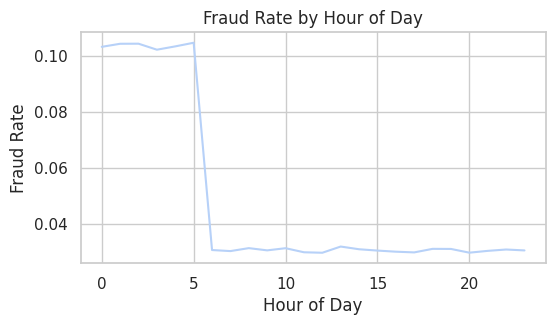

In [ ]:
# Fraud Occurrences by Transaction Hour
sns.set(style="whitegrid")
plt.figure(figsize=(6, 3))
hourly_fraud_rate = df.groupby('Transaction Hour')['Is Fraudulent'].mean()
sns.lineplot(x=hourly_fraud_rate.index, y=hourly_fraud_rate.values, color='#B7D1F8')
plt.title('Fraud Rate by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Fraud Rate')
plt.show()

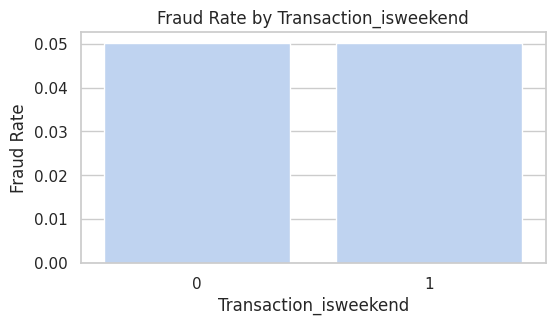

In [ ]:
# Fraud Occurrences by Transaction Is Weekend
sns.set(style="whitegrid")
plt.figure(figsize=(6, 3))
fraud_rate = df.groupby('Transaction_isweekend')['Is Fraudulent'].mean()
sns.barplot(x=fraud_rate.index, y=fraud_rate.values, color='#B7D1F8')
plt.title('Fraud Rate by Transaction_isweekend')
plt.xlabel('Transaction_isweekend')
plt.ylabel('Fraud Rate')
plt.show()

In [ ]:
df1 = df.drop(columns=["Device Used","Payment Method","Product Category"])
df1.head()

,Transaction Amount,Quantity,Customer Age,Is Fraudulent,Account Age Days,Transaction Hour,Transaction Day,Transaction Month,Is Address Match,Transaction_isweekend,Is_Night_Transaction
0,58.090000,1,17.0,0,30,5,20,2,1,0,1
1,389.959991,2,40.0,0,72,8,25,2,1,1,0
2,134.190002,2,22.0,0,63,3,18,3,1,0,1
3,226.169998,5,31.0,0,124,20,16,3,1,1,0
4,121.529999,2,51.0,0,158,5,15,1,1,0,1


In [ ]:
# Replace spaces in column names with underscores
df1.columns = df1.columns.str.replace(' ', '_')

# Verify new column names
print(df1.columns)

Index(['Transaction_Amount', 'Quantity', 'Customer_Age', 'Is_Fraudulent',
       'Account_Age_Days', 'Transaction_Hour', 'Transaction_Day',
       'Transaction_Month', 'Is_Address_Match', 'Transaction_isweekend',
       'Is_Night_Transaction'],
      dtype='object')


In [ ]:
df_majority = df1[df1.Is_Fraudulent == 0]
df_minority = df1[df1.Is_Fraudulent == 1]

# Downsample the majority class
df_majority_downsampled = df_majority.sample(n=len(df_minority), random_state=42)

# Combine the downsampled majority class with the minority class
df_balanced = pd.concat([df_majority_downsampled, df_minority])

# Shuffle the resulting DataFrame
df_balanced = df_balanced.sample(frac=1, random_state=42).reset_index(drop=True)

# Print the new class distribution
print(df_balanced['Is_Fraudulent'].value_counts())

# Now you can proceed with splitting the balanced dataset into train and test sets
X = df_balanced.drop('Is_Fraudulent', axis=1)
y = df_balanced['Is_Fraudulent']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Is_Fraudulent
1    73838
0    73838
Name: count, dtype: int64


In [ ]:
df_train = X_train.copy()
df_train['Is_Fraudulent'] = y_train
df_test = X_test.copy()
df_test['Is_Fraudulent'] = y_test

# Logistic Regression

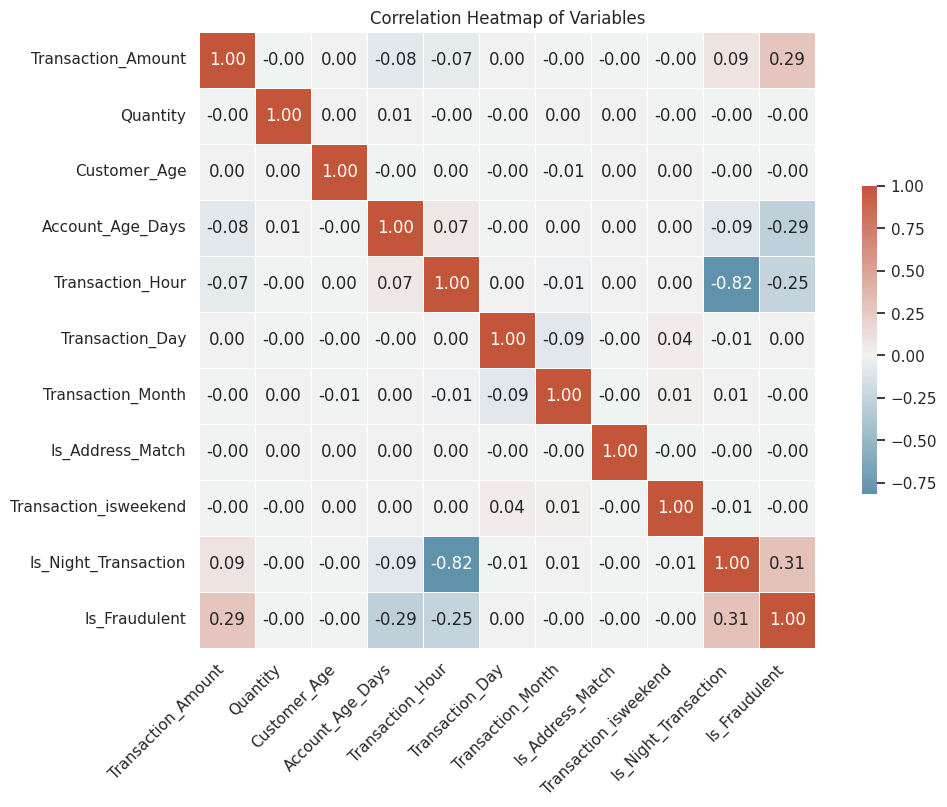

In [ ]:
corr = df_train.corr()
plt.figure(figsize=(12, 8))

cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Create heatmap
heatmap = sns.heatmap(corr, cmap=cmap, vmax=1, center=0, square=True, linewidths=.5,
                      cbar_kws={"shrink": .5}, annot=True, fmt=".2f")

# Rotate the x and y axis labels
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=45, horizontalalignment='right')

plt.title('Correlation Heatmap of Variables')
plt.show()

<ipython-input-26-56e355c4911d>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=value_counts.index, y=value_counts.values, palette='coolwarm')


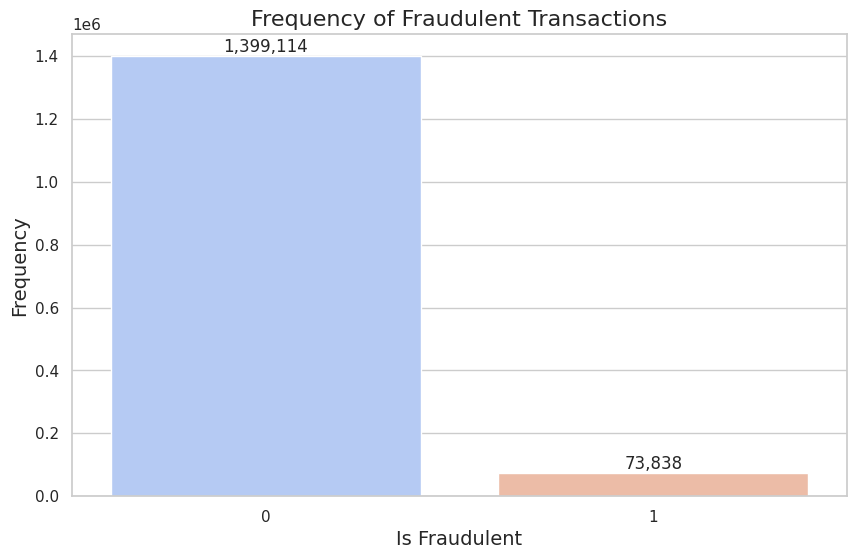

In [ ]:
sns.set(style="whitegrid")

value_counts = df1['Is_Fraudulent'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
ax = sns.barplot(x=value_counts.index, y=value_counts.values, palette='coolwarm')

plt.title('Frequency of Fraudulent Transactions', fontsize=16)
plt.xlabel('Is Fraudulent', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

for i, value in enumerate(value_counts.values):
    ax.text(i, value + 50, f'{value:,}', ha='center', va='bottom', fontsize=12)

plt.show()

<ipython-input-27-bc62794d93c3>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=value_counts.index, y=value_counts.values, palette='coolwarm')


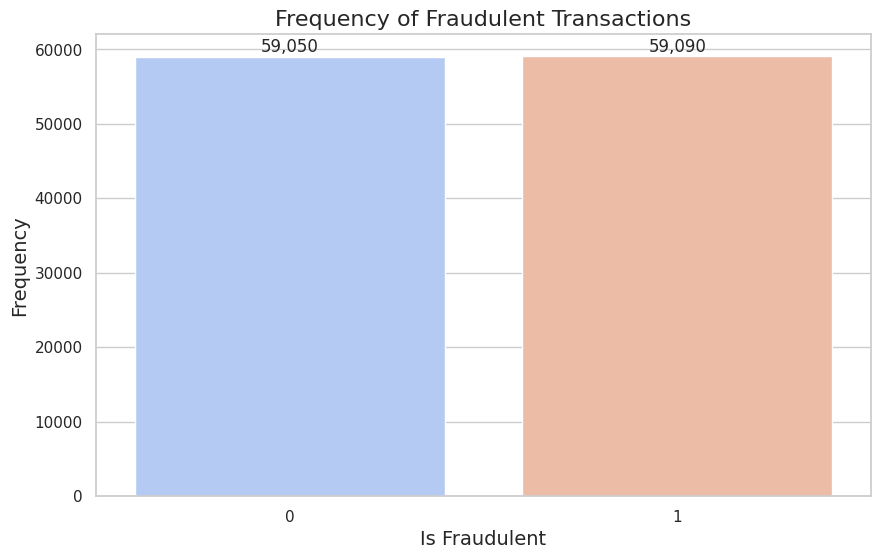

In [ ]:
sns.set(style="whitegrid")

value_counts = df_train['Is_Fraudulent'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
ax = sns.barplot(x=value_counts.index, y=value_counts.values, palette='coolwarm')

plt.title('Frequency of Fraudulent Transactions', fontsize=16)
plt.xlabel('Is Fraudulent', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

for i, value in enumerate(value_counts.values):
    ax.text(i, value + 50, f'{value:,}', ha='center', va='bottom', fontsize=12)

plt.show()

In [ ]:
formula = "Is_Fraudulent ~ Transaction_Amount + Quantity + Customer_Age + Account_Age_Days + Is_Address_Match + Transaction_isweekend + Is_Night_Transaction"

# Fit the logistic regression model
model1 = smf.logit(formula, data=df_train)
result1 = model1.fit()

# Display the results
print(result1.summary())

Optimization terminated successfully.
         Current function value: 0.553802
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:          Is_Fraudulent   No. Observations:               118140
Model:                          Logit   Df Residuals:                   118132
Method:                           MLE   Df Model:                            7
Date:                Tue, 21 May 2024   Pseudo R-squ.:                  0.2010
Time:                        02:28:21   Log-Likelihood:                -65426.
converged:                       True   LL-Null:                       -81888.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                -0.3637      0.037     -9.881      0.000      -0.436      -0.

In [ ]:
formula2 = "Is_Fraudulent ~ Transaction_Amount + Account_Age_Days + Is_Night_Transaction"

# Fit the logistic regression model
model2 = smf.logit(formula2, data=df_train)
result2 = model2.fit()

# Display the results
print(result2.summary())

Optimization terminated successfully.
         Current function value: 0.553805
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:          Is_Fraudulent   No. Observations:               118140
Model:                          Logit   Df Residuals:                   118136
Method:                           MLE   Df Model:                            3
Date:                Tue, 21 May 2024   Pseudo R-squ.:                  0.2010
Time:                        02:44:41   Log-Likelihood:                -65426.
converged:                       True   LL-Null:                       -81888.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               -0.3771      0.013    -27.939      0.000      -0.404      -0.351

Confusion Matrix:
 [[11219  3569]
 [ 5041  9707]]

Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.76      0.72     14788
           1       0.73      0.66      0.69     14748

    accuracy                           0.71     29536
   macro avg       0.71      0.71      0.71     29536
weighted avg       0.71      0.71      0.71     29536



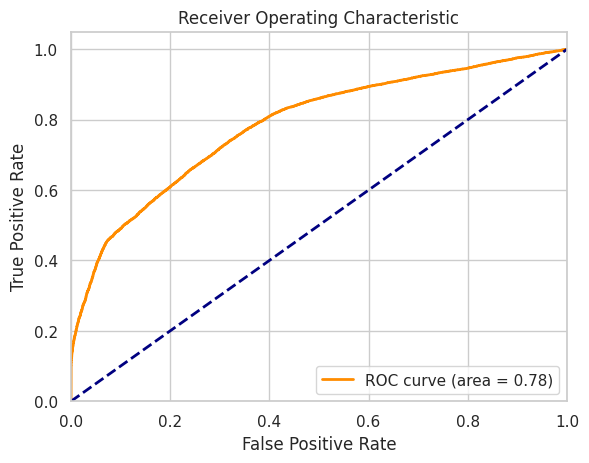

AUC: 0.7848


In [ ]:
# Predict the probabilities of fraud
prob_fraud = result1.predict(sm.add_constant(df_test))

# Binarize the predictions (using 0.5 as the cutoff by default)
pred_fraud = (prob_fraud > 0.5).astype(int)

# Confusion Matrix
cm = confusion_matrix(df_test['Is_Fraudulent'], pred_fraud)
print("Confusion Matrix:\n", cm)

# Classification Report
cr = classification_report(df_test['Is_Fraudulent'], pred_fraud)
print("\nClassification Report:\n", cr)

# ROC Curve
fpr, tpr, thresholds = roc_curve(df_test['Is_Fraudulent'], prob_fraud)
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Calculate AUC
auc_score = roc_auc_score(y_test, prob_fraud)
print(f'AUC: {auc_score:.4f}')


# Trees

## Decision Tree

In [ ]:
param_grid = {
    'min_samples_leaf': [25, 50, 100],
    'max_depth': [3,4,5,6]
}

# Initialize GridSearchCV
cv_dtc = GridSearchCV(DecisionTreeClassifier(random_state=42),
                      param_grid=param_grid,
                      scoring='roc_auc',
                      cv=3,
                      return_train_score=True)

# Fit the model
cv_dtc.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_depth': [3, 4, 5, 6],
                         'min_samples_leaf': [25, 50, 100]},
             return_train_score=True, scoring='roc_auc')

In [ ]:
# Extract the best model
best_tree = cv_dtc.best_estimator_
print("Best parameters:", cv_dtc.best_params_)
print("Best cross-validated AUC:", cv_dtc.best_score_)

# Predict on test data
y_pred = best_tree.predict(X_test)

# Generate classification report
report = classification_report(y_test, y_pred, target_names=['Not Fraudulent', 'Fraudulent'])
print(report)

Best parameters: {'max_depth': 6, 'min_samples_leaf': 100}
Best cross-validated AUC: 0.8160609636013625
                precision    recall  f1-score   support

Not Fraudulent       0.72      0.80      0.76     14788
    Fraudulent       0.78      0.68      0.73     14748

      accuracy                           0.74     29536
     macro avg       0.75      0.74      0.74     29536
  weighted avg       0.75      0.74      0.74     29536



Decision Tree AUC: 0.8188


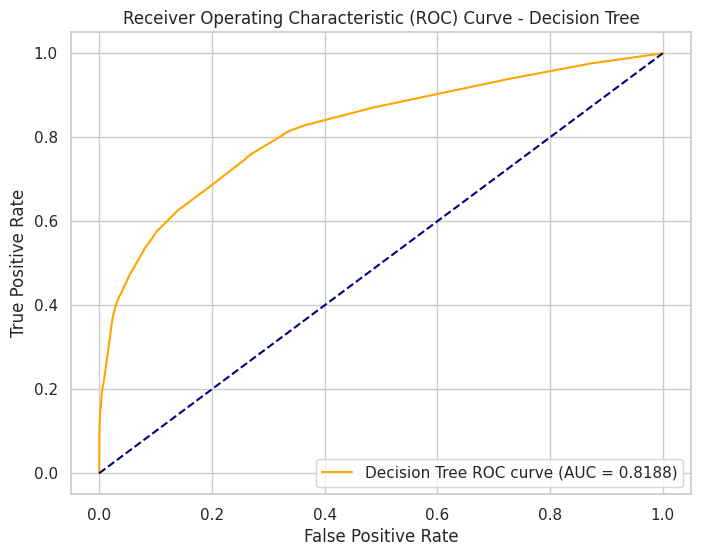

In [ ]:
# Predicted probabilities
y_prob_dt = best_tree.predict_proba(X_test)[:, 1]
# Calculate AUC
auc_dt = roc_auc_score(y_test, y_prob_dt)
print(f'Decision Tree AUC: {auc_dt:.4f}')

# Plot ROC Curve
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_prob_dt)
plt.figure(figsize=(8, 6))
plt.plot(fpr_dt, tpr_dt, color='orange', label=f'Decision Tree ROC curve (AUC = {auc_dt:.4f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Decision Tree')
plt.legend(loc="lower right")
plt.show()

## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import classification_report


# Define parameter grid for Random Forest
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'min_samples_leaf': [10, 25, 50],
    'max_depth': [5, 7, 10]
}

# Initialize RandomizedSearchCV for Random Forest (faster than GridSearchCV)
cv_rf = RandomizedSearchCV(RandomForestClassifier(random_state=42),
                           param_distributions=param_grid_rf,
                           scoring='roc_auc',
                           cv=3,
                           return_train_score=True,
                           n_iter=10,  # Number of parameter settings that are sampled
                           random_state=42)

# Fit the model on the subsample
cv_rf.fit(X_train, y_train)

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42),
                   param_distributions={'max_depth': [5, 7, 10],
                                        'min_samples_leaf': [10, 25, 50],
                                        'n_estimators': [50, 100, 200]},
                   random_state=42, return_train_score=True, scoring='roc_auc')

In [ ]:
# Extract the best model
best_rf = cv_rf.best_estimator_
print("Best parameters:", cv_rf.best_params_)
print("Best cross-validated AUC:", cv_rf.best_score_)

# Predict on test data
y_pred_rf = best_rf.predict(X_test)

# Generate classification report
report_rf = classification_report(y_test, y_pred_rf, target_names=['Not Fraudulent', 'Fraudulent'])
print(report_rf)


Best parameters: {'n_estimators': 50, 'min_samples_leaf': 50, 'max_depth': 10}
Best cross-validated AUC: 0.8164781349006486
                precision    recall  f1-score   support

Not Fraudulent       0.74      0.75      0.75     14788
    Fraudulent       0.75      0.74      0.74     14748

      accuracy                           0.74     29536
     macro avg       0.74      0.74      0.74     29536
  weighted avg       0.74      0.74      0.74     29536



In [ ]:
from sklearn.model_selection import cross_val_predict

# Cross-validation predictions
y_pred_cv_rf = cross_val_predict(best_rf, X, y, cv=3)

# Generate classification report for cross-validation predictions
report_cv_rf = classification_report(y, y_pred_cv_rf, target_names=['Not Fraudulent', 'Fraudulent'])
print(report_cv_rf)

                precision    recall  f1-score   support

Not Fraudulent       0.73      0.77      0.75     73838
    Fraudulent       0.76      0.72      0.74     73838

      accuracy                           0.74    147676
     macro avg       0.75      0.74      0.74    147676
  weighted avg       0.75      0.74      0.74    147676



Decision Tree AUC: 0.8190


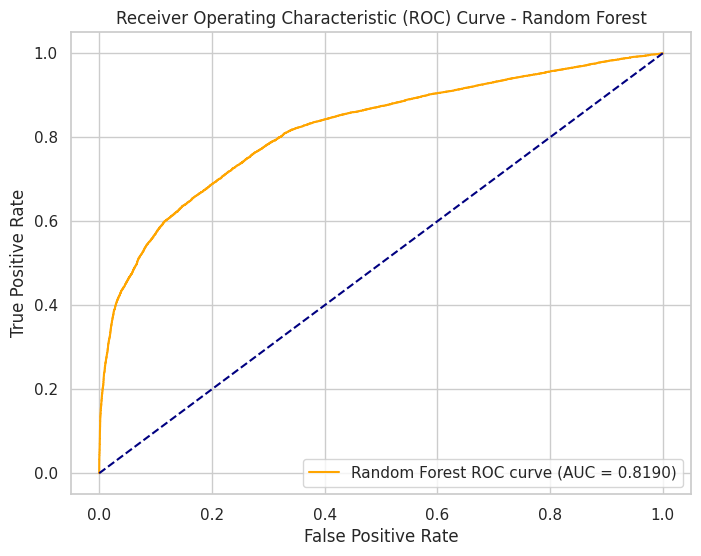

In [ ]:
# Predicted probabilities
y_prob_rf = best_rf.predict_proba(X_test)[:, 1]
# Calculate AUC
auc_rf = roc_auc_score(y_test, y_prob_rf)
print(f'Decision Tree AUC: {auc_dt:.4f}')

# Plot ROC Curve
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, color='orange', label=f'Random Forest ROC curve (AUC = {auc_rf:.4f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Random Forest')
plt.legend(loc="lower right")
plt.show()

## XGBoost

In [ ]:
# Define parameter grid for XGBoost
param_grid_xgb = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2]
}

# Initialize GridSearchCV for XGBoost
cv_xgb = GridSearchCV(XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss'),
                      param_grid=param_grid_xgb,
                      scoring='roc_auc',
                      cv=3,
                      return_train_score=True)

# Fit the model
cv_xgb.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', feature_types=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=42, ...),
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [50, 100, 200]},
             return_train_score=True, scoring='roc_auc')

In [ ]:
# Extract the best model
best_xgb = cv_xgb.best_estimator_
print("Best parameters:", cv_xgb.best_params_)
print("Best cross-validated AUC:", cv_xgb.best_score_)

# Predict on test data
y_pred_xgb = best_xgb.predict(X_test)

# Generate classification report
report_xgb = classification_report(y_test, y_pred_xgb, target_names=['Not Fraudulent', 'Fraudulent'])
print(report_xgb)

Best parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50}
Best cross-validated AUC: 0.8175104917184938
                precision    recall  f1-score   support

Not Fraudulent       0.72      0.82      0.76     14788
    Fraudulent       0.79      0.67      0.73     14748

      accuracy                           0.75     29536
     macro avg       0.75      0.75      0.74     29536
  weighted avg       0.75      0.75      0.74     29536



In [ ]:
from sklearn.model_selection import cross_val_predict

# Cross-validation predictions
y_pred_cv_xgb = cross_val_predict(best_xgb, X, y, cv=3)

# Generate classification report for cross-validation predictions
report_cv_xgb = classification_report(y, y_pred_cv_xgb, target_names=['Not Fraudulent', 'Fraudulent'])
print(report_cv_xgb)


                precision    recall  f1-score   support

Not Fraudulent       0.73      0.78      0.75     73838
    Fraudulent       0.76      0.71      0.74     73838

      accuracy                           0.74    147676
     macro avg       0.75      0.74      0.74    147676
  weighted avg       0.75      0.74      0.74    147676



XGBoost AUC: 0.8202


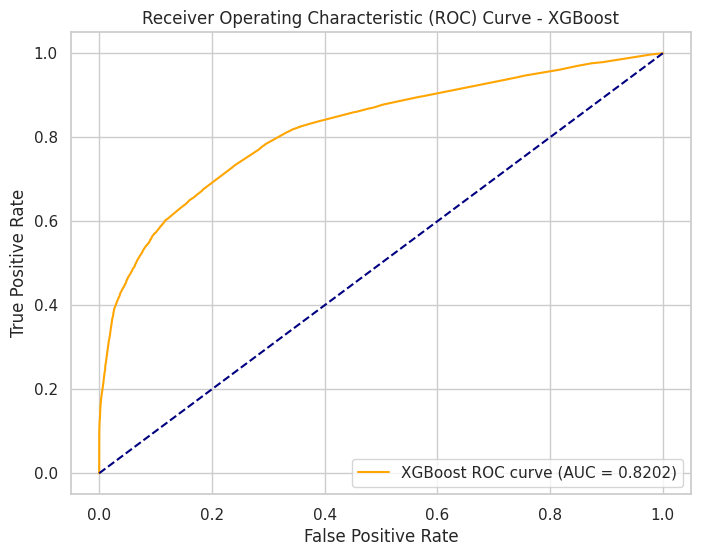

In [ ]:
# Predicted probabilities
y_prob_xgb = best_xgb.predict_proba(X_test)[:, 1]
# Calculate AUC
auc_xgb = roc_auc_score(y_test, y_prob_xgb)
print(f'XGBoost AUC: {auc_xgb:.4f}')

# Plot ROC Curve
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_prob_xgb)
plt.figure(figsize=(8, 6))
plt.plot(fpr_xgb, tpr_xgb, color='orange', label=f'XGBoost ROC curve (AUC = {auc_xgb:.4f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - XGBoost')
plt.legend(loc="lower right")
plt.show()